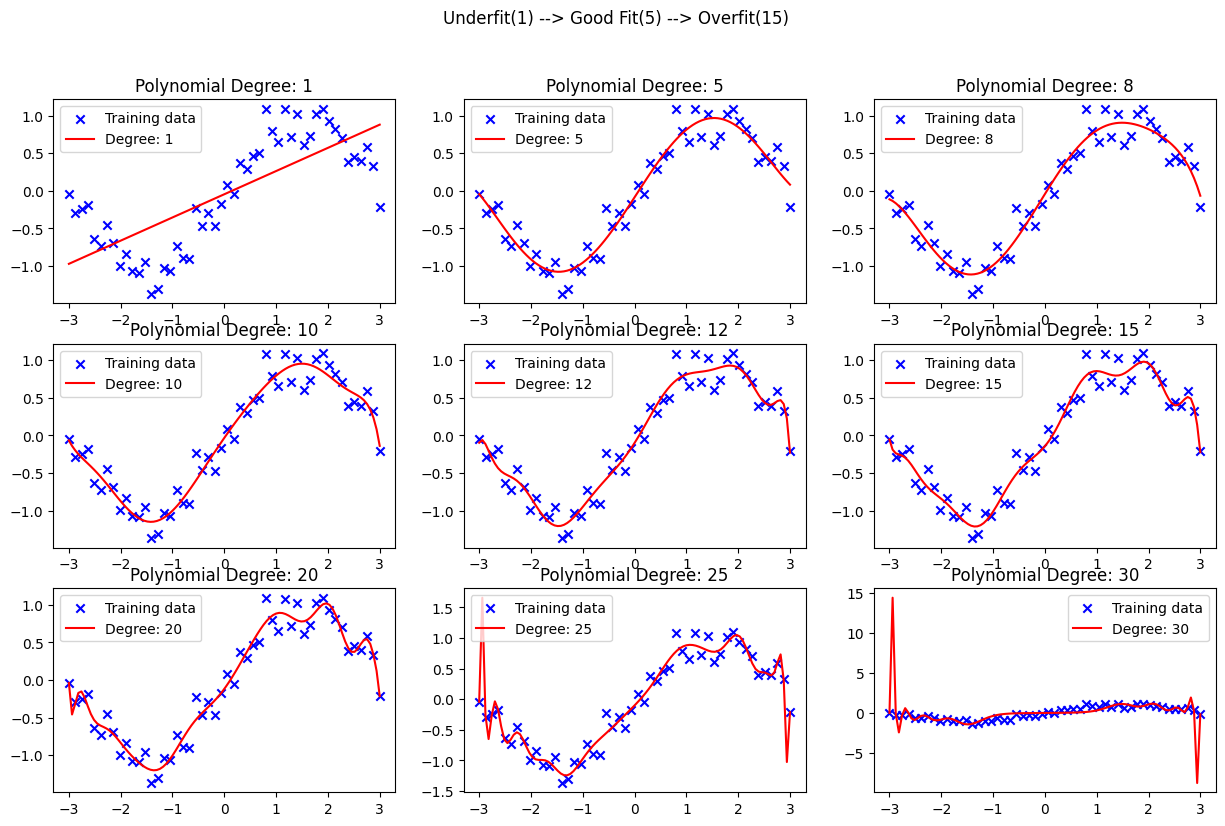

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

np.random.seed(42)
x = np.linspace(-3, 3, 50).reshape(-1, 1)
y = np.sin(x) + np.random.normal(0, 0.2, x.shape)
y = y.ravel()

def predict_poly(degree):
  poly = PolynomialFeatures(degree)
  x_poly = poly.fit_transform(x)

  model = LinearRegression()
  model.fit(x_poly, y)

  x_test = np.linspace(-3, 3, 100).reshape(-1, 1)
  x_test_poly = poly.transform(x_test)
  y_pred = model.predict(x_test_poly)
  return x_test, y_pred
#Plot side by side
degrees = [1, 5, 8, 10, 12, 15, 20, 25, 30]
plt.figure(figsize = (15, 9))

for i, d in enumerate(degrees, 1):
  x_test, y_pred = predict_poly(d)
  plt.subplot(3, 3, i)
  plt.scatter(x, y, color = "Blue", label = 'Training data', marker = 'x')
  plt.plot(x_test, y_pred, color = 'red', label = f"Degree: {d}")
  plt.title(f"Polynomial Degree: {d}")
  plt.legend()
plt.suptitle("Underfit(1) --> Good Fit(5) --> Overfit(15)")
plt.show()